# Final Project Submission

* Student name: Krystian Dennis
* Student pace: Full Time
* Scheduled project review date/time: 6 November 2019 14:00pm
* Instructor name: Abhineet Kulkarni
* Blog post URL: 

# Business Understanding

With the holiday season approaching, it's important to make the best plans for air travel. We will build a model to predict whether or not a flight will be delayed during Year-End Travel Season, spanning December 21-January 2. For the purpose of this study, we will consider the period from December 21-December 31, as January 2019 data is not available. 

# Dataset 

The Dataset contains information on flight delays and cancellation for 2018 from the Bureau of Transportation Statistics. There are over 7 millions records for on-time flight performance for US domestic flights. 

The dataset contains the following columns:

* FL_DATE: Date of the flight, yy/mm/dd
* OP_CARRIER: Airline Identifier
* OP_CARRIER_FL_NUM: Flight Number
* ORIGIN: Starting Airport Code
* DEST: Destination Airport Code
* CRS_DEP_TIME: Planned Departure Time
* DEP_TIME: Actual Departure Time
* DEP_DELAY: Total Delay on Departure in minutes. Positive number = delay.
* TAXI_OUT: The time duration elapsed between departure from the origin airport gate and wheels off
* WHEELS_OFF: The time point that the aircraft's wheels leave the ground
* WHEELS_ON: The time point that the aircraft's wheels touch on the ground
* TAXI_IN: The time duration elapsed between wheels-on and gate arrival at the destination airport
* CRS_ARR_TIME: Planned arrival time
* ARR_TIME: Actual Arrival Time
* ARR_DELAY: Total Delay on Arrival in minutes. Positive number = delay.
* CANCELLED: Flight Cancelled (0 = not cancalled, 1 = cancelled)
* CANCELLATION_CODE: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
* DIVERTED: Aircraft landed on airport that out of schedule
* CRS_ELAPSED_TIME: Planned time amount needed for the flight trip
* ACTUAL_ELAPSED_TIME: AIR_TIME+TAXI_IN+TAXI_OUT
* AIR_TIME: The time duration between wheels_off and wheels_on time
* DISTANCE: Distance between two airports
* CARRIER_DELAY: Delay caused by the airline in minutes
* WEATHER_DELAY: Delay caused by weather
* NAS_DELAY: Delay caused by National Airspace System including air traffic control and non-extreme weather conditions
* SECURITY_DELAY
* LATE_AIRCRAFT_DELAY:Delay caused by security
* Unnamed: 27: Column of commas created while importing the CSV file

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

from cf_matrix import make_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Import and Explore Data

In [7]:
df = pd.read_csv("2018.csv")
display(df.head())
display(df.info())
display(round(df.describe(),2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
FL_DATE                object
OP_CARRIER             object
OP_CARRIER_FL_NUM      int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtypes: float64(20), int64(3),

None

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7213446.00,7213446.00,7101129.00,7096212.00,7097616.00,7097617.00,7094200.00,7094200.00,7213446.00,7094201.00,...,7213436.00,7079004.00,7079004.00,7213446.00,1352710.00,1352710.00,1352710.00,1352710.00,1352710.00,0.0
mean,2607.53,1329.69,1333.85,9.97,17.41,1357.80,1462.16,7.60,1486.34,1466.78,...,141.14,136.50,111.50,799.99,19.46,3.64,15.89,0.09,25.64,NaN
std,1860.12,490.93,504.51,44.83,9.92,505.97,533.47,6.06,518.31,537.71,...,73.34,73.14,71.11,598.18,58.91,30.00,35.89,3.17,49.79,NaN
min,1.00,1.00,1.00,-122.00,1.00,1.00,1.00,1.00,1.00,1.00,...,-99.00,14.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,1029.00,915.00,916.00,-5.00,11.00,932.00,1044.00,4.00,1100.00,1049.00,...,88.00,83.00,60.00,363.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,2131.00,1320.00,1326.00,-2.00,15.00,1340.00,1502.00,6.00,1515.00,1506.00,...,122.00,118.00,92.00,632.00,0.00,0.00,3.00,0.00,3.00,NaN
75%,4074.00,1735.00,1744.00,7.00,20.00,1759.00,1911.00,9.00,1919.00,1916.00,...,171.00,167.00,141.00,1034.00,17.00,0.00,20.00,0.00,31.00,NaN
max,7909.00,2359.00,2400.00,2710.00,196.00,2400.00,2400.00,259.00,2400.00,2400.00,...,704.00,757.00,696.00,4983.00,2109.00,2692.00,1848.00,987.00,2454.00,NaN


In [8]:
rows,cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  7213446
Number of columns:  28


In [9]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

In [10]:
#remove columns that will not be used for analysis
df.drop(['OP_CARRIER_FL_NUM','CRS_DEP_TIME','TAXI_OUT','WHEELS_OFF',
         'WHEELS_ON','TAXI_IN','CRS_ARR_TIME','CANCELLATION_CODE',
         'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY',
         'DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME',
         'Unnamed: 27'], axis =1, inplace =True)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE
0,2018-01-01,UA,EWR,DEN,1512.0,-5.0,1722.0,-23.0,0.0,1605.0
1,2018-01-01,UA,LAS,SFO,1107.0,-8.0,1230.0,-24.0,0.0,414.0
2,2018-01-01,UA,SNA,DEN,1330.0,-5.0,1636.0,-13.0,0.0,846.0
3,2018-01-01,UA,RSW,ORD,1552.0,6.0,1754.0,-2.0,0.0,1120.0
4,2018-01-01,UA,ORD,ALB,650.0,20.0,936.0,14.0,0.0,723.0


In [11]:
df.isnull().sum()

FL_DATE            0
OP_CARRIER         0
ORIGIN             0
DEST               0
DEP_TIME      112317
DEP_DELAY     117234
ARR_TIME      119245
ARR_DELAY     137040
CANCELLED          0
DISTANCE           0
dtype: int64

## Dropping Missing Values

In [12]:
# Dropping missing records
df.dropna(axis = 0, inplace = True)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE
0,2018-01-01,UA,EWR,DEN,1512.0,-5.0,1722.0,-23.0,0.0,1605.0
1,2018-01-01,UA,LAS,SFO,1107.0,-8.0,1230.0,-24.0,0.0,414.0
2,2018-01-01,UA,SNA,DEN,1330.0,-5.0,1636.0,-13.0,0.0,846.0
3,2018-01-01,UA,RSW,ORD,1552.0,6.0,1754.0,-2.0,0.0,1120.0
4,2018-01-01,UA,ORD,ALB,650.0,20.0,936.0,14.0,0.0,723.0


In [13]:
df.isnull().sum()

FL_DATE       0
OP_CARRIER    0
ORIGIN        0
DEST          0
DEP_TIME      0
DEP_DELAY     0
ARR_TIME      0
ARR_DELAY     0
CANCELLED     0
DISTANCE      0
dtype: int64

In [14]:
#remove cancelled flights 
df = df[(df['CANCELLED'] == 0)]

In [15]:
#rename IATA Codes for airlines using full airline names
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [16]:
df.rename(columns ={'OP_CARRIER':'AIRLINE'},inplace=True)

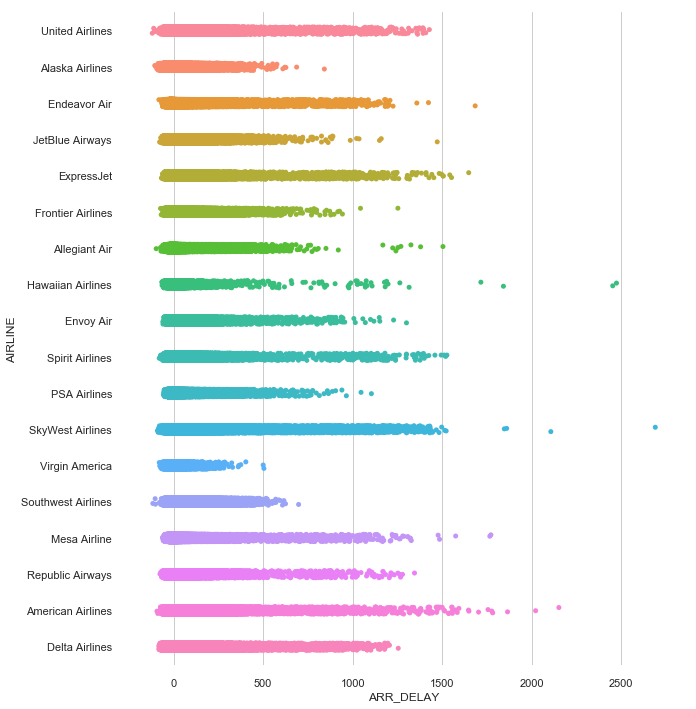

In [17]:
sns.set(style='whitegrid')

fig_dim = (10,12)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

sns.stripplot(x='ARR_DELAY', y='AIRLINE',
              data=df, dodge=True, jitter=True)
plt.show()

In [18]:
#subset data: Top 3 US Airlines only by the International Air Transport Association (IATA) revenue passenger-kilometers.
airlines = ['American Airlines','Delta Airlines','United Airlines']

df = df[df['AIRLINE'].isin(airlines)]
df['AIRLINE'].unique()

array(['United Airlines', 'American Airlines', 'Delta Airlines'],
      dtype=object)

In [19]:
df.shape

(2458279, 10)

In [20]:
#to datetime. set index as FL_DATE
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'],infer_datetime_format=True)
# Month variable
df['FL_DATE_MONTH'] = pd.to_datetime(df['FL_DATE']).dt.month
# Weekday variable
df['FL_DATE_DAY'] = pd.to_datetime(df['FL_DATE']).dt.weekday_name
df.set_index('FL_DATE', inplace =True)

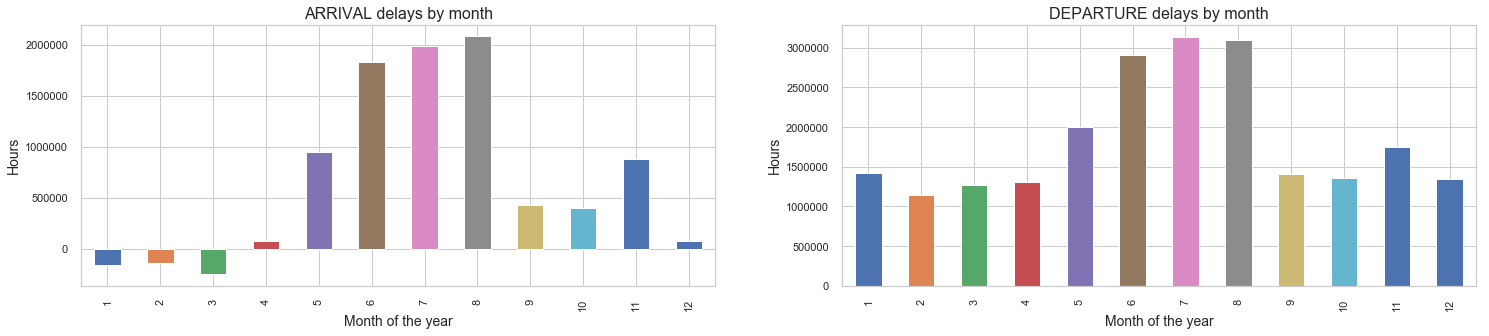

In [21]:
# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
df.groupby('FL_DATE_MONTH').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('FL_DATE_MONTH').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

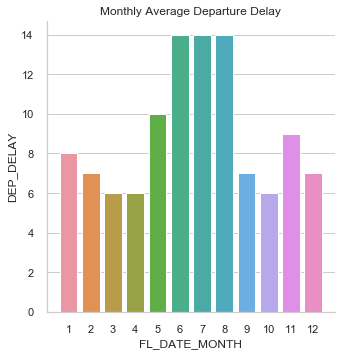

In [22]:
monthly_delay = df.groupby(['FL_DATE_MONTH'], as_index=False).agg({'DEP_DELAY': 'mean'})
monthly_delay['DEP_DELAY']=np.round(monthly_delay['DEP_DELAY'],0)
sns.catplot(x='FL_DATE_MONTH', y='DEP_DELAY',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()

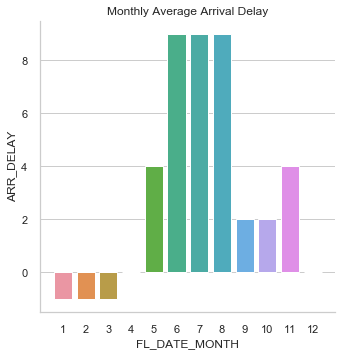

In [23]:
monthly_arr_delay = df.groupby(['FL_DATE_MONTH'], as_index=False).agg({'ARR_DELAY': 'mean'})
monthly_arr_delay['ARR_DELAY']=np.round(monthly_arr_delay['ARR_DELAY'],0)
sns.catplot(x='FL_DATE_MONTH', y='ARR_DELAY',data=monthly_arr_delay, kind='bar')
plt.title("Monthly Average Arrival Delay") 
plt.plot()
plt.show()

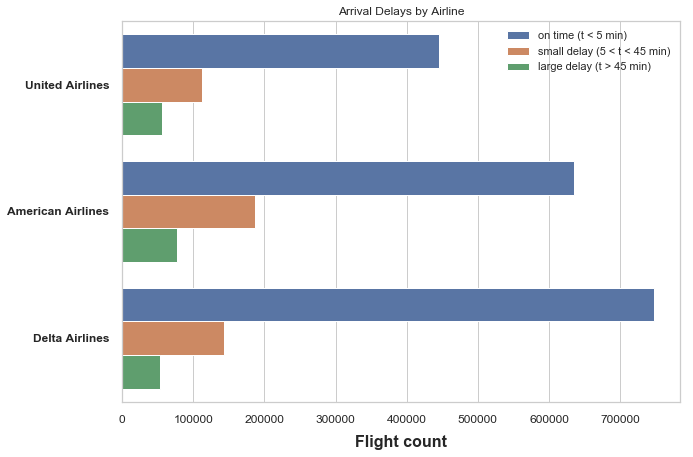

In [24]:
#arrival delay
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['ARR_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
plt.title('Arrival Delays by Airline')

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

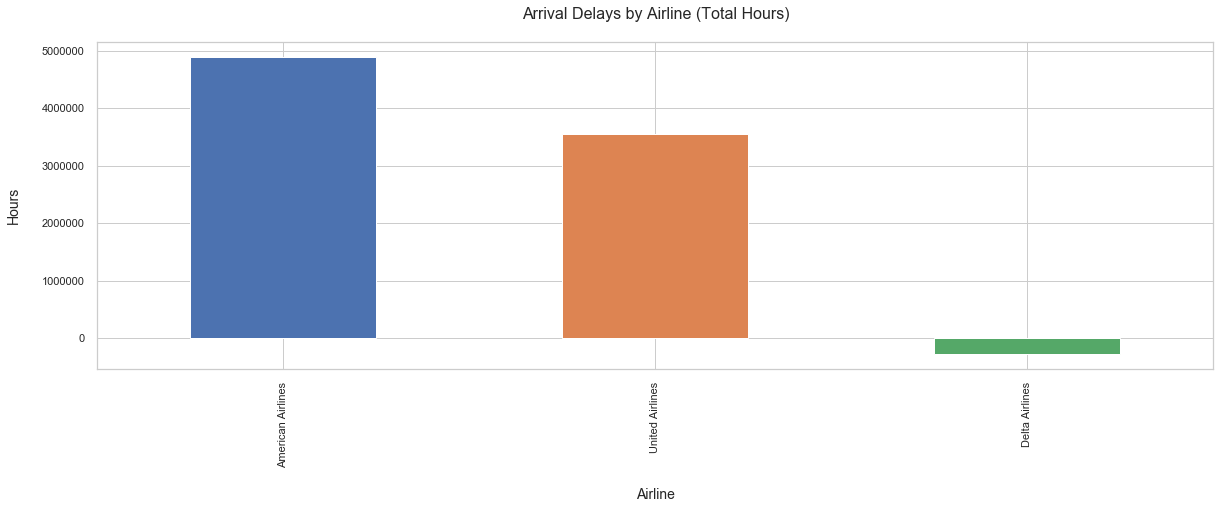

In [25]:
# Delays by airlines
plt.figure(figsize=(20, 6))
df.groupby('AIRLINE')['ARR_DELAY'].sum().sort_values(ascending=False).plot.bar()
plt.title('Arrival Delays by Airline (Total Hours)\n', fontsize=16)
plt.xlabel('\nAirline', fontsize=14)
plt.ylabel('Hours\n', fontsize=14)
plt.show()

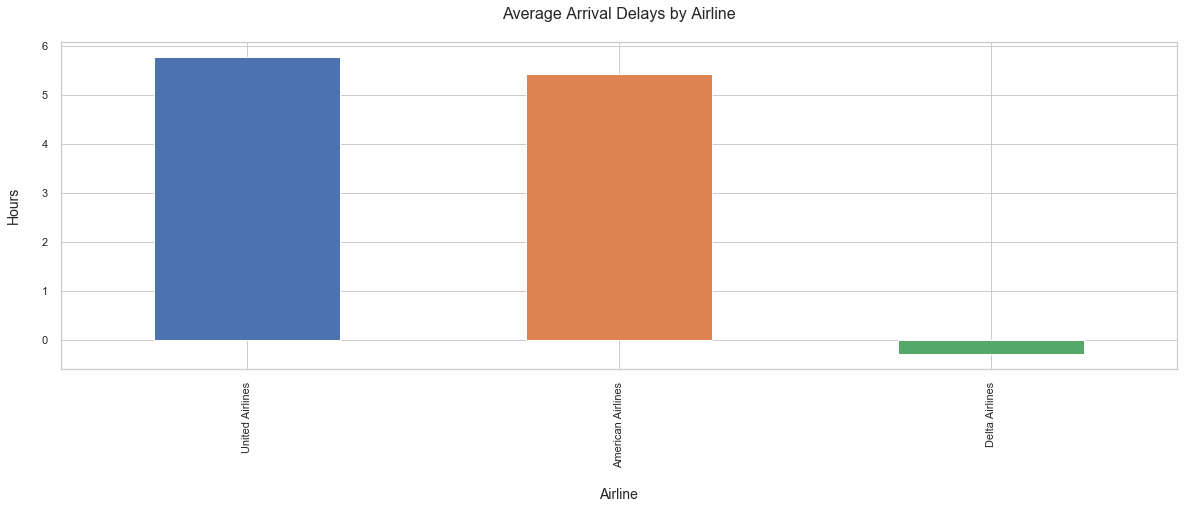

In [26]:
# Delays by airlines
plt.figure(figsize=(20, 6))
df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False).plot.bar()
plt.title('Average Arrival Delays by Airline\n', fontsize=16)
plt.xlabel('\nAirline', fontsize=14)
plt.ylabel('Hours\n', fontsize=14)
plt.show()

In [27]:
#bin ARR_TIME amd DEP_TIME
hour_bins = [-2100,500,1200,1600,2100]
bin_names = ['Red Eye','Morning','Afternoon','Evening']
df['TIME_OF_DAY_DEP'] = pd.cut(df['DEP_TIME'],bins=hour_bins, labels=bin_names)
df['TIME_OF_DAY_ARR'] = pd.cut(df['ARR_TIME'],bins=hour_bins, labels=bin_names)
df.head()

,AIRLINE,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,FL_DATE_MONTH,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR
FL_DATE,,,,,,,,,,,,,,
2018-01-01,United Airlines,EWR,DEN,1512.0,-5.0,1722.0,-23.0,0.0,1605.0,1,Monday,0,Afternoon,Evening
2018-01-01,United Airlines,LAS,SFO,1107.0,-8.0,1230.0,-24.0,0.0,414.0,1,Monday,0,Morning,Afternoon
2018-01-01,United Airlines,SNA,DEN,1330.0,-5.0,1636.0,-13.0,0.0,846.0,1,Monday,0,Afternoon,Evening
2018-01-01,United Airlines,RSW,ORD,1552.0,6.0,1754.0,-2.0,0.0,1120.0,1,Monday,0,Afternoon,Evening
2018-01-01,United Airlines,ORD,ALB,650.0,20.0,936.0,14.0,0.0,723.0,1,Monday,1,Morning,Morning


In [28]:
#faa considers year end travel season December 21-January 2. dataset ends 12-31-2018. #dataset sampled from 12-21-2018-12-31-2018.
df = df['2018-12-21':'2018-12-31']
display(df.head())
display(df.tail())
df.info()

,AIRLINE,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,FL_DATE_MONTH,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR
FL_DATE,,,,,,,,,,,,,,
2018-12-21,Delta Airlines,SLC,LAX,614.0,0.0,714.0,-4.0,0.0,590.0,12,Friday,0,Morning,Morning
2018-12-21,Delta Airlines,TPA,ATL,1448.0,-2.0,1640.0,13.0,0.0,406.0,12,Friday,1,Afternoon,Evening
2018-12-21,Delta Airlines,ATL,TPA,1846.0,9.0,2000.0,-5.0,0.0,406.0,12,Friday,0,Evening,Evening
2018-12-21,Delta Airlines,ATL,DFW,1831.0,2.0,1955.0,-8.0,0.0,731.0,12,Friday,0,Evening,Evening
2018-12-21,Delta Airlines,DFW,ATL,1724.0,-1.0,2032.0,2.0,0.0,731.0,12,Friday,0,Evening,Evening


,AIRLINE,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,FL_DATE_MONTH,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR
FL_DATE,,,,,,,,,,,,,,
2018-12-31,American Airlines,DCA,CLT,1530.0,-4.0,1709.0,-5.0,0.0,331.0,12,Monday,0,Afternoon,Evening
2018-12-31,American Airlines,CLT,DFW,1757.0,6.0,1953.0,1.0,0.0,936.0,12,Monday,0,Evening,Evening
2018-12-31,American Airlines,CLT,MEM,2010.0,-5.0,2118.0,11.0,0.0,511.0,12,Monday,1,Evening,NaN
2018-12-31,American Airlines,CLT,RDU,1323.0,23.0,1404.0,14.0,0.0,130.0,12,Monday,1,Afternoon,Afternoon
2018-12-31,American Airlines,RDU,CLT,1443.0,8.0,1542.0,-4.0,0.0,130.0,12,Monday,0,Afternoon,Afternoon


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69168 entries, 2018-12-21 to 2018-12-31
Data columns (total 14 columns):
AIRLINE            69168 non-null object
ORIGIN             69168 non-null object
DEST               69168 non-null object
DEP_TIME           69168 non-null float64
DEP_DELAY          69168 non-null float64
ARR_TIME           69168 non-null float64
ARR_DELAY          69168 non-null float64
CANCELLED          69168 non-null float64
DISTANCE           69168 non-null float64
FL_DATE_MONTH      69168 non-null int64
FL_DATE_DAY        69168 non-null object
DELAY_LEVEL        69168 non-null int64
TIME_OF_DAY_DEP    63390 non-null category
TIME_OF_DAY_ARR    58110 non-null category
dtypes: category(2), float64(6), int64(2), object(4)
memory usage: 7.0+ MB


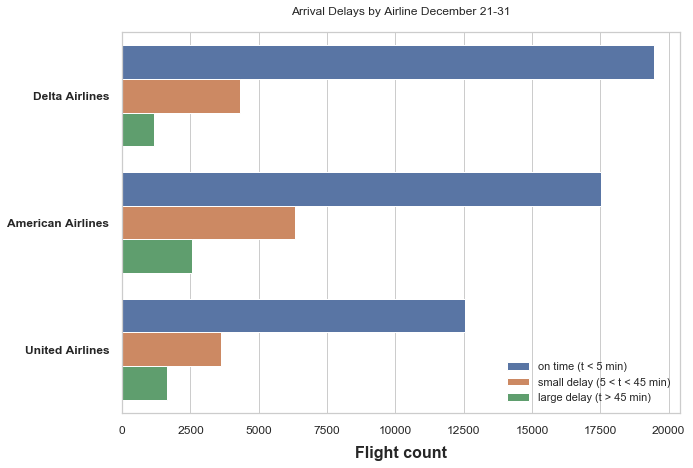

In [29]:
#arrival delay December 21-31
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL_HOLIDAY'] = df['ARR_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL_HOLIDAY', data=df)

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
plt.title('Arrival Delays by Airline December 21-31\n')
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [30]:
#remove columns that will not be used for analysis. FL_DATE_MONTH not needed because only December dates included.
df.drop(['CANCELLED','FL_DATE_MONTH','ARR_TIME','DEP_TIME','DELAY_LEVEL_HOLIDAY'], axis =1, inplace =True)

In [31]:
df.reset_index(inplace=True)
df.head()

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR
0,2018-12-21,Delta Airlines,SLC,LAX,0.0,-4.0,590.0,Friday,0,Morning,Morning
1,2018-12-21,Delta Airlines,TPA,ATL,-2.0,13.0,406.0,Friday,1,Afternoon,Evening
2,2018-12-21,Delta Airlines,ATL,TPA,9.0,-5.0,406.0,Friday,0,Evening,Evening
3,2018-12-21,Delta Airlines,ATL,DFW,2.0,-8.0,731.0,Friday,0,Evening,Evening
4,2018-12-21,Delta Airlines,DFW,ATL,-1.0,2.0,731.0,Friday,0,Evening,Evening


In [32]:
#arrival delays less than 15 minutes are general delays according to FAA
df['DELAY_15'] = df['ARR_DELAY'].apply(lambda x: 'Delayed' if x >= 15 else 'Not Delayed')
df['DELAY_15'] = df['DELAY_15'].map({'Delayed':1, 'Not Delayed':0})

In [33]:
df['DEP_DELAY'] = df['DEP_DELAY'].astype(int)
df['ARR_DELAY'] = df['ARR_DELAY'].astype(int)
df['DISTANCE'] = df['DISTANCE'].astype(int)

In [34]:
display(df.head())
df.dtypes

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR,DELAY_15
0,2018-12-21,Delta Airlines,SLC,LAX,0,-4,590,Friday,0,Morning,Morning,0
1,2018-12-21,Delta Airlines,TPA,ATL,-2,13,406,Friday,1,Afternoon,Evening,0
2,2018-12-21,Delta Airlines,ATL,TPA,9,-5,406,Friday,0,Evening,Evening,0
3,2018-12-21,Delta Airlines,ATL,DFW,2,-8,731,Friday,0,Evening,Evening,0
4,2018-12-21,Delta Airlines,DFW,ATL,-1,2,731,Friday,0,Evening,Evening,0


FL_DATE            datetime64[ns]
AIRLINE                    object
ORIGIN                     object
DEST                       object
DEP_DELAY                   int32
ARR_DELAY                   int32
DISTANCE                    int32
FL_DATE_DAY                object
DELAY_LEVEL                 int64
TIME_OF_DAY_DEP          category
TIME_OF_DAY_ARR          category
DELAY_15                    int64
dtype: object

In [35]:
y = df['DELAY_15']
X = df.drop(['DELAY_15'], axis=1)

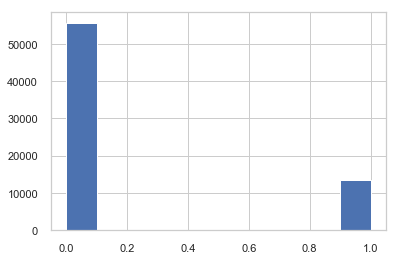

In [36]:
y.hist()

In [37]:
#convert to categorical features
categories = ['ORIGIN', 'DEST','AIRLINE','FL_DATE','FL_DATE_DAY','DELAY_LEVEL','TIME_OF_DAY_ARR','TIME_OF_DAY_DEP'] # Categorical features
for feature in X[categories]: # Loop through all columns in the dataframe
    X[feature] = pd.Categorical(X[feature]).codes 

## Multicollinearity

Let's check to see that our predictor variables are not too highly correlated with one another. We need to be able to assume that one variable can change while the others remain constant. This assumption cannot be made if one or more predictors variables are highly correlated with another. A high correlation coefficient is considered bewteen 0.7 and 0.8. For this analysis, I chose 0.75. 

In [38]:
df_copy = X.copy()
df_copy.dtypes

FL_DATE             int8
AIRLINE             int8
ORIGIN             int16
DEST               int16
DEP_DELAY          int32
ARR_DELAY          int32
DISTANCE           int32
FL_DATE_DAY         int8
DELAY_LEVEL         int8
TIME_OF_DAY_DEP     int8
TIME_OF_DAY_ARR     int8
dtype: object

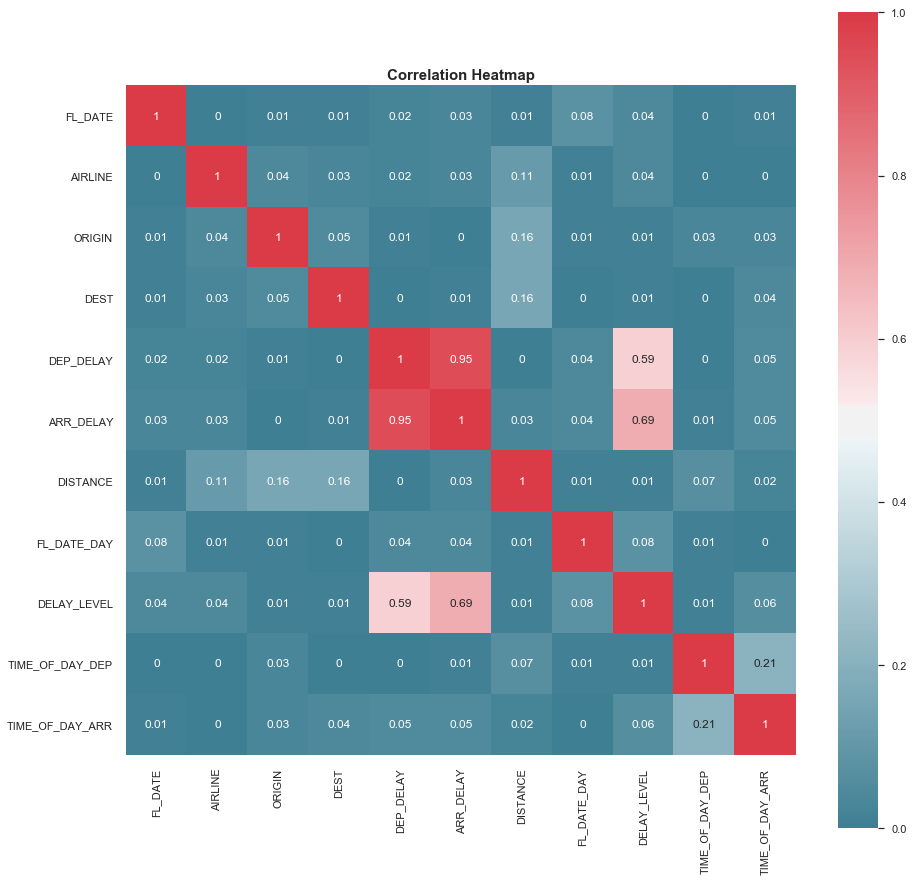

In [39]:
correlation = abs(round(df_copy.corr(), 2))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot = True, square=True, cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

In [40]:
collinearity = correlation > 0.75
collinearity

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,DISTANCE,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR
FL_DATE,True,False,False,False,False,False,False,False,False,False,False
AIRLINE,False,True,False,False,False,False,False,False,False,False,False
ORIGIN,False,False,True,False,False,False,False,False,False,False,False
DEST,False,False,False,True,False,False,False,False,False,False,False
DEP_DELAY,False,False,False,False,True,True,False,False,False,False,False
ARR_DELAY,False,False,False,False,True,True,False,False,False,False,False
DISTANCE,False,False,False,False,False,False,True,False,False,False,False
FL_DATE_DAY,False,False,False,False,False,False,False,True,False,False,False
DELAY_LEVEL,False,False,False,False,False,False,False,False,True,False,False
TIME_OF_DAY_DEP,False,False,False,False,False,False,False,False,False,True,False


Because of high correlation with DEP_DELAY, I chose to drop ARR_DELAY from the dataset. 

In [41]:
X.drop(['ARR_DELAY',], axis =1, inplace =True)

In [42]:
X.head()

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,DISTANCE,FL_DATE_DAY,DELAY_LEVEL,TIME_OF_DAY_DEP,TIME_OF_DAY_ARR
0,0,1,142,82,0,590,0,0,1,1
1,0,1,152,4,-2,406,0,1,2,3
2,0,1,5,147,9,406,0,0,3,3
3,0,1,5,39,2,731,0,0,3,3
4,0,1,40,4,-1,731,0,0,3,3


In [43]:
X.dtypes

FL_DATE             int8
AIRLINE             int8
ORIGIN             int16
DEST               int16
DEP_DELAY          int32
DISTANCE           int32
FL_DATE_DAY         int8
DELAY_LEVEL         int8
TIME_OF_DAY_DEP     int8
TIME_OF_DAY_ARR     int8
dtype: object

## Split Data into Training and Validation Sets

In [44]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Building Classification Models

Pipelines are created to streamline the process, conducting scaling, grid search and optimized model refitting in one step. Four classification models have been chosen:

- K Nearest Neighbors - K Nearest Neighbors is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between 2 points, the more similar they are. It can be used for both Classification and Regression tasks.

- Random Forest - Random Forest algorithm is an ensemble of Decision Trees. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

- XGBoost - XGBoost is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible. XGBoost is a great choice for classification tasks. It provides best-in-class performance compared to other classification algorithms.

- Support Vector Machines - SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

GridsearchCV will be used to tune the models by finding the best perfoming parameters. 

## Creating Pipelines with GridSearchCV

In [45]:
#create pipelines with GridSearch
pipe_knn = make_pipeline(StandardScaler(), GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors':[5,10,20,40,50],
              'metric': ['manhattan', 'euclidean','minkowski'],
              'weights': ['uniform', 'distance']}, scoring='accuracy', cv=5, verbose = False, refit = True, return_train_score = True))
 
pipe_rf = make_pipeline(StandardScaler(), GridSearchCV(RandomForestClassifier(random_state=42), param_grid= {'n_estimators': [4,10,20,50],
                'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 5, 10, 15],'class_weight': ['balanced', None]},
                scoring= 'accuracy',cv=5, verbose = False, refit = True, return_train_score = True))
       
pipe_xgb = make_pipeline(StandardScaler(), GridSearchCV(xgb.XGBClassifier(), param_grid= {'colsample_bytree': [0.3, 0.7, 1],
    'n_estimators': [5,10,20,40,50],
    'max_depth': [3, 5, 10]}, scoring= 'accuracy', cv=5, verbose = False, refit = True, return_train_score = True))
                              
pipe_svm = make_pipeline(StandardScaler(), GridSearchCV(svm.SVC(gamma = 'auto', random_state=42),
            param_grid = {'C': [0.1, 1,5, 10], 'kernel': ('linear','rbf')},
           scoring= 'accuracy', cv=5, verbose = False, refit = True, return_train_score = True))

In [46]:
# list of pipelines, list of pipeline names
pipelines = [pipe_knn,pipe_rf, pipe_xgb,pipe_svm]
pipeline_names = ['K Nearest Neighbors','Random Forest','XGBoost','Support Vector Machine']

In [47]:
#fit each pipeline
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'),
                              iid='warn', n_jobs=None,
                              param_grid={'metric': ['manhattan', 'euclidean',
                                                     'minkowski'],
            

## Best Model Parameters

Final model constructed with best parameters for KNN.

* **Distance Metric**: Manhattan
* **Number of Neighbors**: 40
* **Weights**: Distance
__________________________________________________________________________________

Final model constructed with best parameters for Random Forest. Random_State = 42 included for reproducibility.

* **Bootstrap**: True
* **Class Weight**: None
* **Criterion**: Entropy
* **Max Depth**: 10
* **Number of Estimators**: 20
__________________________________________________________________________________

Final model constructed with best parameters for XGBoost.

* **Colsample Bytree**: 0.7
* **Max Depth**: 10
* **Number of Estimators**: 40
__________________________________________________________________________________

Final model constructed with best parameters for SVM.

* **C**: 5
* **Kernel**: RBF
* **Gamma**: Auto

## Model Predictions

Predictions made for training data and test data using optimized models so that model performance can be assessed.

In [52]:
#predictions training data
train_knn_preds = pipe_knn.predict(X_train)
train_rf_preds = pipe_rf.predict(X_train)
train_svm_preds = pipe_svm.predict(X_train)
train_xgb_preds = pipe_xgb.predict(X_train)

In [53]:
#predictions test data
knn_preds = pipe_knn.predict(X_test)
rf_preds = pipe_rf.predict(X_test)
svm_preds = pipe_svm.predict(X_test)
xgb_preds = pipe_xgb.predict(X_test)

## Confusion Matrix and Classification Report - K Nearest Neighbors

### Training  Data

In [54]:
#metrics KNearestneighbors. train and test data done to compare model accuracy.
print(confusion_matrix(y_train, train_knn_preds))
print(classification_report(y_train, train_knn_preds))

[[44647     0]
 [    7 10680]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44647
           1       1.00      1.00      1.00     10687

    accuracy                           1.00     55334
   macro avg       1.00      1.00      1.00     55334
weighted avg       1.00      1.00      1.00     55334



### Test Data - K Nearest Neighbors

[[10669   465]
 [  530  2170]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11134
           1       0.82      0.80      0.81      2700

    accuracy                           0.93     13834
   macro avg       0.89      0.88      0.88     13834
weighted avg       0.93      0.93      0.93     13834



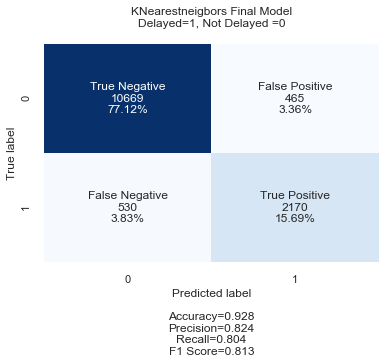

In [55]:
knn_cf = confusion_matrix(y_test,knn_preds)
labels = ['True Negative','False Positive','False Negative', 'True Positive']
title = 'KNearestneigbors Final Model\nDelayed=1, Not Delayed =0\n'
make_confusion_matrix(knn_cf, group_names=labels, title=title, cbar=False)

print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

## ROC Curve and AUC - K Nearest Neighbors

In [56]:
fpr, tpr, thresholds = roc_curve(y_train, train_knn_preds)
train_knn_auc = round(auc(fpr, tpr),2)
train_knn_auc

1.0

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, knn_preds)
knn_auc = round(auc(fpr, tpr),2)
knn_auc

0.88

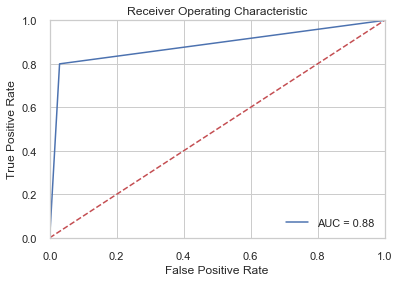

In [76]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % knn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix and Classification Report - Random Forest

### Training Data 

In [58]:
print(confusion_matrix(y_train, train_rf_preds))
print(classification_report(y_train, train_rf_preds))

[[43606  1041]
 [ 2113  8574]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     44647
           1       0.89      0.80      0.84     10687

    accuracy                           0.94     55334
   macro avg       0.92      0.89      0.90     55334
weighted avg       0.94      0.94      0.94     55334



### Test Data

[[10808   326]
 [  564  2136]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11134
           1       0.87      0.79      0.83      2700

    accuracy                           0.94     13834
   macro avg       0.91      0.88      0.89     13834
weighted avg       0.93      0.94      0.93     13834



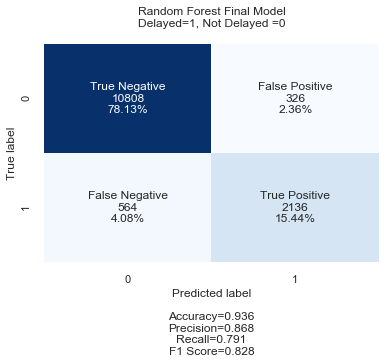

In [59]:
rf_cf = confusion_matrix(y_test,rf_preds)
labels = ['True Negative','False Positive','False Negative', 'True Positive']
title = 'Random Forest Final Model\nDelayed=1, Not Delayed =0\n'
make_confusion_matrix(rf_cf, group_names=labels, title=title, cbar=False)

print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

## ROC Curve and AUC - Random Forest

In [60]:
fpr, tpr, thresholds = roc_curve(y_train, train_rf_preds)
train_rf_auc = round(auc(fpr, tpr),2)
train_rf_auc

0.89

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, rf_preds)
rf_auc = round(auc(fpr, tpr),2)
rf_auc

0.88

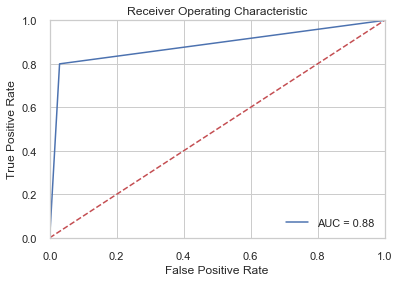

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix and Classification Report - Support Vector Machines

### Training Data 

In [62]:
print(confusion_matrix(y_train, train_svm_preds))
print(classification_report(y_train, train_svm_preds))

[[43286  1361]
 [ 1890  8797]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     44647
           1       0.87      0.82      0.84     10687

    accuracy                           0.94     55334
   macro avg       0.91      0.90      0.90     55334
weighted avg       0.94      0.94      0.94     55334



### Test Data

[[10707   427]
 [  514  2186]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11134
           1       0.84      0.81      0.82      2700

    accuracy                           0.93     13834
   macro avg       0.90      0.89      0.89     13834
weighted avg       0.93      0.93      0.93     13834



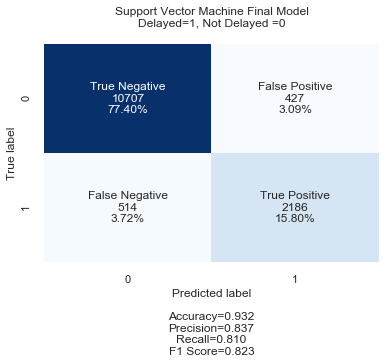

In [63]:
svm_cf = confusion_matrix(y_test,svm_preds)
labels = ['True Negative','False Positive','False Negative', 'True Positive']
title = 'Support Vector Machine Final Model\nDelayed=1, Not Delayed =0\n'
make_confusion_matrix(svm_cf, group_names=labels, title=title, cbar=False)

print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

## ROC Curve and AUC - Support Vector Machines

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, train_svm_preds)
train_svm_auc = round(auc(fpr, tpr),2)
train_svm_auc

0.9

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, svm_preds)
svm_auc = round(auc(fpr, tpr),2)
svm_auc

0.89

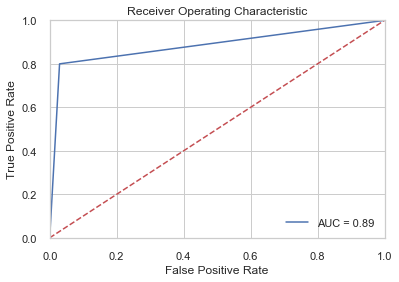

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % svm_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix and Classification Report - XGBoost

### Training Data 

In [66]:
print(confusion_matrix(y_train, train_xgb_preds))
print(classification_report(y_train, train_xgb_preds))

[[44072   575]
 [ 1428  9259]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     44647
           1       0.94      0.87      0.90     10687

    accuracy                           0.96     55334
   macro avg       0.96      0.93      0.94     55334
weighted avg       0.96      0.96      0.96     55334



### Test Data

[[10806   328]
 [  540  2160]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11134
           1       0.87      0.80      0.83      2700

    accuracy                           0.94     13834
   macro avg       0.91      0.89      0.90     13834
weighted avg       0.94      0.94      0.94     13834



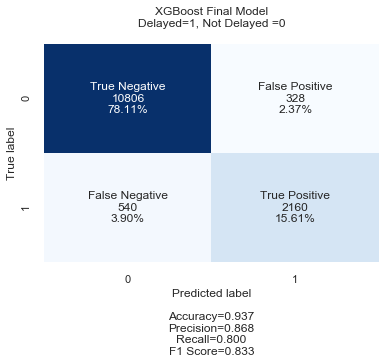

In [67]:
cf = confusion_matrix(y_test,xgb_preds)
labels = ['True Negative','False Positive','False Negative', 'True Positive']
title = 'XGBoost Final Model\nDelayed=1, Not Delayed =0\n'
make_confusion_matrix(cf, group_names=labels, title=title, cbar=False)

print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

## ROC Curve and AUC - XGBoost

In [68]:
fpr, tpr, thresholds = roc_curve(y_train, train_xgb_preds)
train_xgb_auc = round(auc(fpr, tpr),2)
train_xgb_auc

0.93

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_preds)
xgb_auc = round(auc(fpr, tpr),2)
xgb_auc

0.89

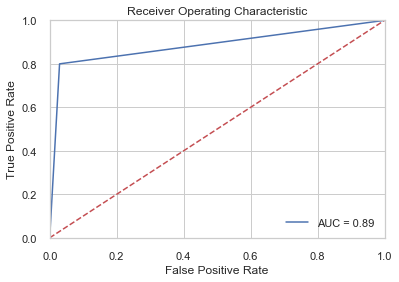

In [75]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % xgb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparing Models

In [49]:
#compare accuracies - train data
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_train, y_train)))

K Nearest Neighbors pipeline test accuracy: 1.000
Random Forest pipeline test accuracy: 0.943
XGBoost pipeline test accuracy: 0.964
Support Vector Machine pipeline test accuracy: 0.941


In [50]:
#compare accuracies - test data
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

K Nearest Neighbors pipeline test accuracy: 0.928
Random Forest pipeline test accuracy: 0.936
XGBoost pipeline test accuracy: 0.937
Support Vector Machine pipeline test accuracy: 0.932


In [51]:
best_acc = 0.0
best_clf = 0
best_pipe = ''
for index, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = index
print('Classifier with best accuracy: %s' % pipeline_names[best_clf])

Classifier with best accuracy: XGBoost


The classifier with the highest accuracy is **XGBoost** at **93.7%**. Random Forest and Support Vector Machines were not far behind with accuracies at 93.6% and 93.2% respectively. 

In [ ]:
#from xgboost import plot_importance

#plot_importance(boost_2)
#plt.show()

<img src= 'XGB Feature Importance.png' height=75% width=75%>

In [ ]:
#sorted_idx = np.argsort(boost_2.feature_importances_)[::-1]
#for index in sorted_idx:
#    print([X_train.columns[index], boost_2.feature_importances_[index]]) 

In [ ]:
['DISTANCE', 0.23953465]
['DEST', 0.19549185]
['ORIGIN', 0.18115716]
['DEP_DELAY', 0.09753817]
['TIME_OF_DAY_ARR', 0.07925626]
['FL_DATE', 0.06616807]
['FL_DATE_DAY', 0.050690766]
['AIRLINE', 0.043315675]
['TIME_OF_DAY_DEP', 0.039368443]
['DELAY_LEVEL', 0.0074789654]

The top 5 most important features in our XGBoost Model are:

1. Distance
2. Destination
3. Origin
4. Departure Delay
5. Arrival Time

## Future Work

1. Determine which days are best for holiday travel
2. Study how time of departure impacts delays
3. Find which airports are best for avoiding delays
4. See how distance impacts delays

## Appendix

<img src= 'Worst-Christmas-Travel-Dates.png' height=100% width=100%>

https://www.smartertravel.com/best-and-worst-days-for-holiday-travel/

<img src= 'Holiday Travel Forecast.png' height=100% width=100%>

<img src= 'worst days.jpg' height=100% width=100%>

https://www.cntraveler.com/story/these-are-the-busiest-days-for-holiday-travel-this-year?utm_source=nl&utm_brand=cnt&utm_mailing=CNT_Daily_PM_110519&utm_campaign=aud-dev&utm_medium=email&bxid=5bda451f3f92a40f7d4f609d&cndid=10799541&hasha=ab1a9602f106357125fad9b3d8b1ffe6&hashb=1609645c4a77e5036c1e6a36d81510b0cd033314&hashc=0c75784d8536eb549117cfdf19ffa9aa9b961a504c0e1c277ccf0be095c40788&esrc=ETL_BATCH&utm_term=CNT_Daily